<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

# $D^0 \rightarrow K^- \pi^+$ decays: calculating the lifetime measurement <a name="c"></a>


In the following analysis we aim to obtain the lifetime measurement of [$D^{0}$](https://en.wikipedia.org/wiki/D_meson) mesons decaying into a kaon and a pion with opposite charge.

The $D^{0}$ meson is composed of a $c$ quark and an $\bar{u}$ antiquark (as we've seen in the Introduction to Particle Physics notebook) and among all the possible routes, it can decay to the final state $K^-\pi^+$. The kaon is composed of $u$ quark and an $\bar{s}$ antiquark and the pion is composed of a $u$ quark and an $\bar{d}$ antiquark. Since the $D^{0}$ meson has zero electric charge, the final state particles $K^-\pi^+$ must have opposite charges. The reasor for that is **charge conservation**! The overall charge in both sides of our decay process must be the same!

Electric charges:

<div class="alert alert-success">
$D^0 \rightarrow K^- \pi^+$: $0 \rightarrow -1 +1$
</div>

Let's start with understanding the idea of a decay process.

We want to find $D^{0}$ mesons, but they don't live long enough to actually see with the detector itself. Instead, we have to **reconstruct** them from their decay products. We don't particularly mind where the $D^{0}$s themselves come from. All you need to know here is that each time the LHC smashes two protons together, they produce lots and lots of particles, some of which are $D^{0}$s.


From theory, we know that there are several decay routes as you can see in [here](https://pdglive.lbl.gov/Particle.action?init=0&node=S032&home=MXXX035#decayclump_C) but today we are interested in the particular decay route $D^{0} \to K^{-} \pi^{+}$.


In this option, a random $D^{0}$ emerges from the collision aftermath in the LHC (we don't care how) can decay directly to $K^-\pi^+$ with opposite charge. The decay happens at the vertex below, where the $D^0$ blue line changes to a kaon and pion lines (purple and red respectively). We denote a kaon by the letter $K^{-}$ and a pion by $\pi^+$, with their respective charges on top. 

<figure>
    <center> <img src="images/D0-decay.png" alt="image missing" style="width:40%" />
   <figcaption>Image 1: The $D^0$ decay directly from the proton-proton collision. &copy; <a href="https://reader.elsevier.com/reader/sd/pii/S2405601415006811?token=6FB63C7A4CA7A9942923D4464E1D0026C06C3D8B7F2480E5D95FAAE090160896368E92EBE888890A4213BCF7055A7856&originRegion=eu-west-1&originCreation=20221101130344">LHCb Masterclass</a> [1]</figcaption> </center>
</figure>

Now that we know about 4-vectors and we know how to manipulate them, we will look at the $D^{0}$ decay to $K^- \pi^+$ but firstly, we need to discuss what is the liferime and how we measure it in our decay of interest.

**Contents:**
- [Lifetime](#1.)
- [The invariant mass calculation](#2.)
- [Cuts](#3.)
- [Over to you! To four leptons](#3.)
- [Real experiments](#4.)
- [Extension exercises](#5.)

---

## Lifetime <a name="1."></a>



The data sample we are going to use for this notebook consists of candidates for the $D^0$ meson found in a sample randomly collected by the LHCb detector during the 2011 data-taking period. 

The LHCb detector can measure the momentum and energy of muons coming out of decays, and you can access that information quite simply. We mentioned earlier that each smash makes lots of particles. That's true - in fact, it makes so many that we can't actually store all the records of what happened, even on some of the biggest data storage facilities in the world. Therefore, we select only events that are interesting to us, in particular, we want to see exactly **one kaon and one pion** in the final state.


The $D^0$ particles have a distinctive feature and that is their measurably long lifetime. The average lifetime is $4 \cdot 10^{-13}$ seconds. 

It travels increadibly fast, actually nearly at the speed of light at LHCb (typically $\nu \sim 0.99919 \cdot c$). If you remember from your basic newtonian physics course, to calculate the average distance we would take our velocity and multiply it by the time but, since our particle travels at very high speed, we need to take into account relativistic effects. Therefore, the average distance travelled is expected to be:

<CENTER> $0.4 \beta \gamma c = 3$mm </CENTER>

where $\gamma$ is the Lorentz factor.

<div class="alert alert-warning"> If you don't know about special relativity, don't worry! What we need to know is that when we are dealing with increadibly fast particles travelling along our detector, we need to include this information and the way we do it is adjusting our expressions with the Lorentz factor.
</div>

Fast mesons live longer, this a lifetime at rest of 0.4ps means a lifetime inside the exoeriment of about 10ps or even longer. Another possible process is when the $D^0$ appears as a child of a $B$ particle. In this case we can measure the displacement which we are going to call the *impact parameter (IP)*. The IP is defined as the perpendicular distance between the path of our $D^0$ particle and the center of the collision. 


<figure>
    <center> <img src="images/B-D0-decay.png" alt="image missing" style="width:40%" />
   <figcaption>Image 2: Secondary verteces displaced from the proton-proton collision. &copy; <a href="https://reader.elsevier.com/reader/sd/pii/S2405601415006811?token=6FB63C7A4CA7A9942923D4464E1D0026C06C3D8B7F2480E5D95FAAE090160896368E92EBE888890A4213BCF7055A7856&originRegion=eu-west-1&originCreation=20221101130344">LHCb Masterclass</a> [1]</figcaption> </center>
</figure>

When we are dealing with the case where the $D^0$ is produced directly from the proton-proton collisions (as in Image 1), the IP is small, but when it comes as a child of the $B$ meson, the IP is large. This fact, together with their abundant production, allows the $D^0$ signals to be well separated from the background of the underlying event, most of which consists of random combinations of particles produced in the proton-proton collision.





Next we have to open the data that we want to analyze. As described earlier, the data is stored in a *.root file. We can use a python library called uproot to access the data. Below is an example of how to open a *.root file using uproot

In [6]:
## data file
f = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root") ## 13 TeV sam

We can inspect the contents of a file by using the method keys()

In [7]:
f.keys()

['mini;1']

We see that we have an object called 'mini'. We can obtain information about the object in the file and its type by using the method classnames()

In [8]:
f.classnames()

{'mini;1': 'TTree'}

We see that the object called mini is a TTree type. A TTree is simply columns of data stored in the .root format. Each column of data can represent a different physical quantity of a particle. For instance, its charge, energy, momentum etc.

Now we know what data the file contains, in future we can quickly access that data. We want to access the mini data. This can be done by executing the command below


In [9]:
events = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")

Let's look at contents of the TTree. Essentially all the columns in the TTree called mini

In [10]:
events.keys()

['runNumber',
 'eventNumber',
 'channelNumber',
 'mcWeight',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',
 'scaleFactor_PHOTON',
 'scaleFactor_TAU',
 'scaleFactor_BTAG',
 'scaleFactor_LepTRIGGER',
 'scaleFactor_PhotonTRIGGER',
 'trigE',
 'trigM',
 'trigP',
 'lep_n',
 'lep_truthMatched',
 'lep_trigMatched',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_E',
 'lep_z0',
 'lep_charge',
 'lep_type',
 'lep_isTightID',
 'lep_ptcone30',
 'lep_etcone20',
 'lep_trackd0pvunbiased',
 'lep_tracksigd0pvunbiased',
 'met_et',
 'met_phi',
 'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'jet_jvt',
 'jet_trueflav',
 'jet_truthMatched',
 'jet_MV2c10',
 'photon_n',
 'photon_truthMatched',
 'photon_trigMatched',
 'photon_pt',
 'photon_eta',
 'photon_phi',
 'photon_E',
 'photon_isTightID',
 'photon_ptcone30',
 'photon_etcone20',
 'photon_convType',
 'tau_n',
 'tau_pt',
 'tau_eta',
 'tau_phi',
 'tau_E',
 'tau_isTightID',
 'tau_truthMatched',
 'tau_trigMatched',
 'tau_nTracks',
 'tau_BDTid

## The invariant mass calculation <a name="2."></a>

One very important quantity we need to define is the invariant mass! It is defined as an invariant quantity which is the same for all observers in all reference frames (that's why we call it *invariant*). To calculate it we use the energy, *E*, and momentum, *p*, both measured in the detector. To derive a proper expression for the invariat mass we ask that in the process both energy and momentum are conserved! 

* Energy conservation

$ E = E_K + E_\pi $

* Momentum conservation

$ \vec{p} = \vec{p}_K + \vec{p}_\pi $

From special relativity we've learned the relation between mass, energy and momentum to be:

$ (pc)^2 + (mc^2)^2 = E^2 $

$ E^2 = p^2 + m^2$

Rearraging it to $m$:

$ m^2 = E^2 - p2 = (E_K + E_\pi)^2 - || p_K + p_\pi ||$

$ m^2 = (E_K + E_\pi)^2 - (\vec{p}_K + \vec{p}_\pi)\cdot (\vec{p}_K + \vec{p}_\pi)$

Since the dot product of two orthogonal vectors is zero, we can write more explicitly

$ m^2 = (E_K + E_\pi)^2 - (p_{K_x} + p_{\pi_x} )^2 - (p_{K_y} + p_{\pi_y} )^2 - (p_{K_z} + p_{\pi_z} )^2$

<div class="alert alert-info"> Our goal is to calculte the invariant mass of the two chosen particles and if the mass is close to the $D^0$ mass, we save it to a histogram.</div> 

In [12]:
sel_events = events.arrays(["H1_p", "H2_p", "H3_p", "H1_E", "H2_E", "H3_E"])

We want to run over all the data and reconstruct the $D^0$ meson mass. To do this we will access events using the arrays method again. Let's look at doing this.

First we define a histogram. To do this we can import the python hist library. Once we have done that we can define a histogram. Its name is hist and the x axis is named $m(K^- \pi^+)$ [GeV]. The three initial arguments indicate that this histogram contains 30 bins which fill the gap from 1810 to 1920.


In [13]:
import hist
from hist import Hist

hist = Hist(hist.axis.Regular(100,1810,1920, label = "$m(K^- \\pi^+)$ (GeV)"))

It is now time to fill our above defined histogram with the masses. When filling our histogram we also want to be exclude events that don't satisfy a specific requirement. In our case we only want $D^0$ events in the region: $2.5 < p_T < 20$, $0 < \tau < 10$ and $-4 < IP_{D^0} < 1.5$.

**The process of narrowing down the number of candidates by imposing a condition is called making a cut**.

[Return to contents](#c)

---

## Cuts <a name="4."></a>

Why do we make cuts? Remember that there are lots of other particles flying around that we measure, these might be processes we are **not** interested in. Obviously, they won't reconstruct to a $D^0$ meson.

Therefore, we need to not count these events based on that, so we **cut** on the fact that our $D^0$ particles lie in a particular region of transverse momentum, tau and impact parameter. 


### Make sure you read through the code - particularly the comments! You'll be doing this yourself shortly.

The $D^0$ meson decays to:
- $D^0 \rightarrow K^- \pi^+$


This means we can deduce the following for a *pass event*:
- There must be 2 mesons produced by the event - see by observation
- Must be of opposite charge, or equivalently of *unequal charge* (since only two possibilities for charge)
- Must be a kaon and a pion

Let's open our LHCb data but now selecting only the events satisfying the criteria:

1. are **not** muons: `!K_isMuon` and `!pi_isMuon==` where `!` means *not*, so `!K_isMuon` reads "K is *not* a muon"

In [14]:
# Define preselection
preselection = ""

f = uproot.open(":DecayTree", where=preselection)

In [ ]:
# Extracting the momentum components and energy of the first muon
p1x = events["K_PX"].array(library="np")
p1y = events["K_PY"].array(library="np")
p1z = events["K_PZ"].array(library="np")
p1E = events["K_E"].array(library="np")

Let's visualise one of these momentum components, for instance let's check the x-component of the $\mu^-$! To do that we first define a histogram, and we fill it with the values we extracted in `p1x`.

In [ ]:
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np

# Defining histogram
hist_p1x = Hist(hist.axis.Regular(100,-150e3,150e3, label = "$p_{1x}$ (GeV)"))

# Fiblling histogram with values of p1x
hist_p1x.fill(p1x)

# Plotting the histogram
hist_p1x.plot()
plt.show()

Great! Momentum is a **vector** quantity, it has x,y and z components. Now let's try to calculate the magnitude of the momentum, $p^{2} = p_{x}^{2} + p_{y}^{2} + p_{z}^{2}$, of the first kaon candidate and plot it into a histogram: 

In [ ]:
# Calulating the magnitude of the momentum:
p1 = np.sqrt( p1x**2 + p1y**2, p1z**2)

# Defining histogram
hist_p1 = Hist(hist.axis.Regular(100,-150e3,150e3, label = "$p_{\mu^-}$ (GeV)"))

# Fiblling histogram with values of p1x
hist_p1.fill(p1)

# Plotting the histogram
hist_p1.plot()
plt.show()

### Your turn!

We've calculated the magnitude of the momentum for the $\mu^-$. Repeat that now for the other muon, $\mu^+$!

The first step is to extract the momentum components. Then plot one of the components as an example, for instace the x-component. Finally, calculate and plot the magnitude of the momentum for the second muon.

In [ ]:
# Extracting the momentum components and energy of the second muon
p2x = events["muplus_PX"].array(library="np")
p2y = events["muplus_PY"].array(library="np")
p2z = events["muplus_PZ"].array(library="np")
p2E = events["muplus_E"].array(library="np")

# Defining histogram
hist_p2x = Hist(hist.axis.Regular(100,-150e3,150e3, label = "$p_{2x}$ (GeV)"))

# Filling histogram with values of p1x
hist_p2x.fill(p2x)

# Plotting the histogram
hist_p2x.plot()
plt.show()

In [ ]:
# Calulating the magnitude of the momentum:
p2 = np.sqrt( p2x**2 + p2y**2, p2z**2)

# Defining histogram
hist_p2 = Hist(hist.axis.Regular(100,-150e3,150e3, label = "$p_{\mu^+}$ (GeV)"))

# Fiblling histogram with values of p1x
hist_p2.fill(p2)

# Plotting the histogram
hist_p2.plot()
plt.show()

<div class="alert alert-success">
Great Job!
</div>

## Find the $D^0$ meson! <a name="4."></a>

Now that we've learned how to obtain the momentum and energy, we are ready to reconstruct the invariant mass! After filling the histogram we want to see the results of the analysis. We import `matplotlib` and get plotting!

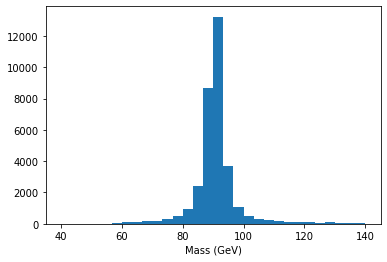

In [15]:
m = np.sqrt((p1E + p2E)**2 - (p1x + p2x)**2 - (p1y + p2y)**2 - (p1z + p2z)**2)
hist_mass.fill(m)

hist_mass.plot(histtype = "fill")
plt.show()

<div class="alert alert-success">

__Congratulations!__ If everything went well, you have just reconstructed the $D^0$ meson!
    
</div>


*Interpret this graph - what is the mass of this meson?*

<details>
    <summary>Answer: </summary>
        That's right - 1865 GeV!
</details>

[Return to contents](#c)

---

## Fitting the mass peak <a name="5."></a>

Now that we have reconstructed the $D^0$ mass, the next step is to fit the histogram. To fit the histogram is to try to find the best function, (or combination of funtions) that reproduce the shape we see in our data. Let's start with a simple example. 

Imagine we have a set of data points and we want to find a line that passes nearby our points.

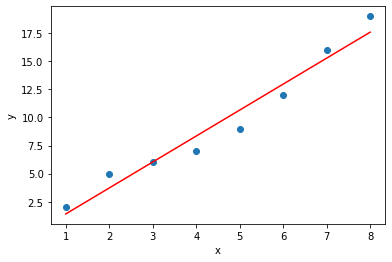

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#define data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([2, 5, 6, 7, 9, 12, 16, 19])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

#add line of best fit to plot
plt.plot(x, a*x+b, c="red")       

In our plot, the blue dots represent our data and the red line is the best line we can draw that reproduces the behavior of our data. Our LHCb data is not as simple as this example, but the idea is the same, We want to find the best curve that reproduces the shape of the mass distribution we found. It won't be a straight line as our data does not have this kind of pattern, but there are other types of functions that we can use.

### Gaussian function

One very commonly used is the Gaussian function (also known as the normal distribution). We can represent it by the function:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \big(\frac{x-\mu}{\sigma}\big)^2}$

And if we want to draw this function, we can run the following line:

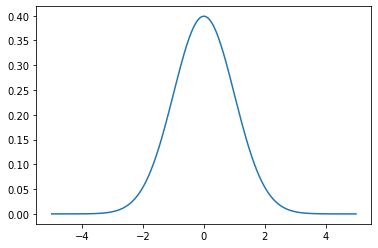

In [5]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

## generate the data and plot it for an ideal normal curve

## x-axis for the plot
x_data = np.arange(-5, 5, 0.001)

## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, 0, 1)

## plot data
plt.plot(x_data, y_data)


Interesting... it looks like this gaussian function has some similarities with the mass peak we found! So perhaps we can use this Gaussian function in our fit to the mass peak. When dealing with gaussian functions, two very important features are the mean value of the function, $\mu$, and the width, $\sigma$. The $\mu$ is the value which our curve is cetered at, in this case, the gaussian peak is centered at zero. The $\sigma$ is the width of the distrbution, in this case we can see that the distribution is basically over before -2 and after 2. So the total width here is 4.

<div class="alert alert-warning"> Don't worry if the function has a complicated mathematical expression, the idea here is that since it looks a lot like our peak, we can use this function to learn features of our data!
</div>


Great! It seems that our mass peak has a gaussian centeres at around 1865 GeV and outside this gaussian, the distribution looks like a horizontal line.

The gaussian-like behavior represents the $D^0 \to K^- \pi^+$ candidates, our signal events, and the events in this flat horizontal distribution are called background events. Signal events are the ones corresponding to our process of interest, while background events correspond to processes that we are not interested in. In this case, they correspond to combinatorial background.

With all that said, we are ready to fit our invariant mass distribution!


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

ydata = np.array([2., 2., 11., 0., 5., 7., 18., 12., 19., 20., 36., 11., 21., 8., 13., 14., 8., 3., 21., 0., 24., 0., 12.,
0., 8., 11., 18., 0., 9., 21., 17., 21., 28., 36., 51., 36., 47., 69., 78., 73., 52., 81., 96., 71., 92., 70., 84.,72.,
88., 82., 106., 101., 88., 74., 94., 80., 83., 70., 78., 85., 85., 56., 59., 56., 73., 33., 49., 50., 40., 22., 37., 26.,
6., 11., 7., 26., 0., 3., 0., 0., 0., 0., 0., 3., 9., 0., 31., 0., 11., 0., 8., 0., 9., 18.,9., 14., 0., 0., 6., 0.])

xdata = np.arange(0, len(ydata), 1)

#plt.plot(xdata, ydata, 'bo', label='data')

popt, pcov = curve_fit(gauss, xdata, ydata, p0=[ydata.max(), ydata.mean(), ydata.std()])
#plt.plot(xdata, gauss(xdata, *popt), 'r-', label='fit')


<figure>
    <center> <img src="images/D0-fit.png" alt="image missing" style="width:50%" /></center>
</figure>

Great! Now we can see how many signal and background events we have from our fit. To measure the $D^0$ lifetime properly, we need to get rid of these background events that lie under the signal peak. So, our next step is what we call **background subtraction**.

Let's define our signal to be almost fully contained in the window $[1840-1890]$MeV.

In particular, an interval of $\pm1\sigma$ around the mean value contains 68% of the signal, while $\pm3\sigma$ contains 99.7% of the signal. So, if $\sigma=8.2, \pm3\sigma = 24.6$ which corresponds to the limits: $1866.5-24.6 = 1841.9$ and $1866.5+24.6 = 1891.1$.

We can also check the transverse momentum and impact parameter distribution

<figure>
    <center> <img src="images/D0-pT.png" alt="image missing" style="width:50%" /></center>
    <center> <img src="images/D0-IP.png" alt="image missing" style="width:50%" /></center>
</figure>

From that we can obtain the decay time distribution as $t = \frac{ml}{p}$

<figure>
    <center> <img src="images/D0-t.png" alt="image missing" style="width:50%" /></center>
</figure>

From the decay time distribution, we can measure the lifetime by fitting the decay time and checking the slope

<figure>
    <center> <img src="images/D0-lifetime.png" alt="image missing" style="width:50%" /></center>
</figure>

<div class="alert alert-success">

__Congratulations!__ If everything went well, you have just calculated the lifetime of the $D^0$ meson!
    
</div>


---

## Over to you!

Now that you've learned how to measure the lifetime of the $D^0$ meson,

Repeat step 4 but now varying the upper D0 log(IP) variable range from 1.5 to -2 in steps of 0.2. Do you notice a pattern? Does the D0 lifetime with an log(IP) cut of-1.5 agree better or worse with the PDG than the lifetime with an log(IP) cut of 1.5 ?

Another interesting discussion is to compare the lifetime of different particles! You might have noticed that in another notebook, the lifetime of the $B$ meson is calculated following the exact same procedure we did here. Reach one of your friends doing the $B$ meson lifetime and compare your results. Are they different? If yes, why are they different?